In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import trapz
from scipy.integrate import cumulative_trapezoid

##Reading the data


file_name = 'xi_measurement.dat'
try:
    df = pd.read_csv(
        file_name,
        delim_whitespace=True,
        comment='#',
        header=None,
        names=['theta', 'xi_data', 'sigma_xi']
    )
    
    theta_i = df['theta'].values
    d_i = df['xi_data'].values
    
    print(f"Successfully loaded data from {file_name}.")
    print("First 5 rows of data:")
    print(df.head())
    print("\n")

except Exception as e:
    print(f"Error loading data file {file_name}: {e}")
    # Stop execution if data isn't loaded
    exit()


Successfully loaded data from xi_measurement.dat.
First 5 rows of data:
      theta   xi_data  sigma_xi
0  2.805046  4.513944       1.5
1  3.531344  3.825825       1.5
2  4.445699  8.495667       1.5
3  5.596803  5.063101       1.5
4  7.045957  6.269586       1.5




/scratch-local/slurm-job-tmp-10629411/ipykernel_100/4070042947.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [76]:
###Example-1 option B
theta_values = df['theta']
xi_values = df['xi_data']
sigma_values = df['sigma_xi']
sigma = 1.5
A_min = 0
A_max = 4

print(np.sum(xi_values * theta_values**0.5)/np.sum(theta_values))
##defining model:
def model_1(A,theta):
    return A*np.sqrt(theta)


2.3018952470402483


$$p(A|d)=C\int_{0}^{4} exp(\frac{-1}{2}\sum_{i=1}^{N}\frac{(d_i-A\theta^{0.5}_i)^2}{\sigma^2}dA$$  



This integral should be zero that constant C includes bayesian evidence, $\frac{1}{4}$ and constant comes from each gaussian. ##That is my calculation##

In [77]:
##Calculating the inner of the integral above
def summation_in_integral(A_test):
    """
    Calculates the sum of squared, weighted residuals for a given A.
    """
    model_predictions = model_1(A_test, theta_i)
    residuals = xi_values - model_predictions
    sum_sq_residuals = np.exp(-0.5*np.sum((residuals / sigma)**2))
    return sum_sq_residuals


    

In [78]:
## defining a grid or possible values for A
A_grid = np.linspace(A_min, A_max, 2000)

##For each A corresponding value
unnormalized_posterior = np.array([summation_in_integral(A) for A in A_grid])

### trapezoid method for integration
#unnormalized_posterior = np.exp()
integral = trapz(unnormalized_posterior, A_grid)
normalization_cons = 1/integral
print(normalization_cons)
print("Posterior for A (from Part A) calculated and normalized.")
print(integral,'hello')
normalized_posterior=normalization_cons*unnormalized_posterior
### checking the results
print(trapz(normalized_posterior,A_grid))
           
##GREATT!!





780289.3021358085
Posterior for A (from Part A) calculated and normalized.
1.281575945310027e-06 hello
1.0000000000000002


0.15849999999999997

--- Part B Results ---
Best-fit A (posterior peak): 2.3012
68.3% Confidence Interval for A: [2.2560, 2.3477]


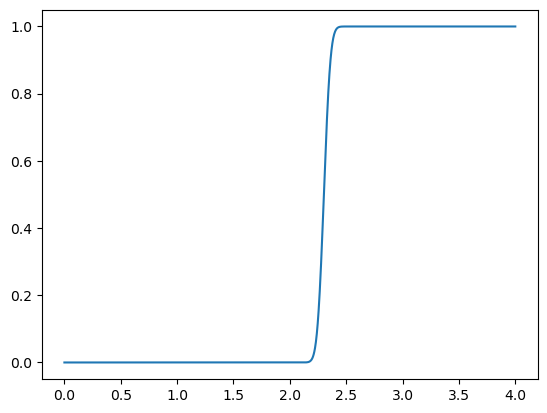

In [6]:


# First, compute the Cumulative Distribution Function (CDF)
# The CDF is the cumulative integral of the posterior
cdf = cumulative_trapezoid(normalized_posterior, A_grid, initial=0)


# The 68.3% central interval leaves (1.0 - 0.683) / 2.0 = 0.1585 in each tail
prob_low = (1.0 - 0.683) / 2.0
prob_high = 1.0 - prob_low
print(prob_low)

# Now we find the A-values that correspond to these cumulative probabilities
# We use linear interpolation (np.interp) to find the A-value for any prob.
A_low = np.interp(prob_low, cdf, A_grid)
A_high = np.interp(prob_high, cdf, A_grid)

# Find the peak of the posterior (the "best-fit" value)
best_fit_A = A_grid[np.argmax(normalized_posterior)]

print("\n--- Part B Results ---")
print(f"Best-fit A (posterior peak): {best_fit_A:.4f}")
print(f"68.3% Confidence Interval for A: [{A_low:.4f}, {A_high:.4f}]")

plt.plot(A_grid,cdf)

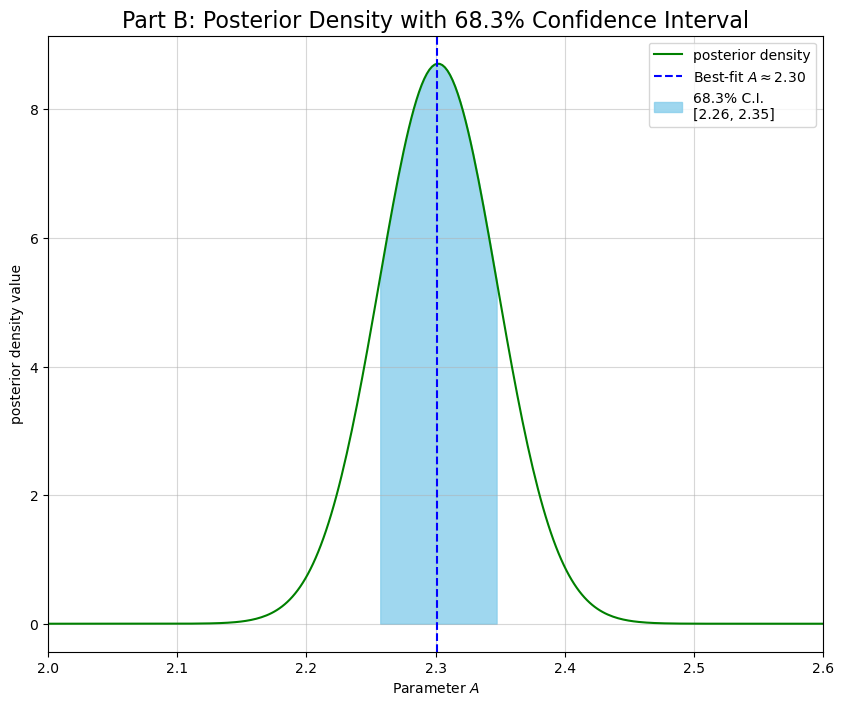

In [79]:
## plot the result:::
plt.figure(figsize=(10,8))
plt.plot(A_grid , normalized_posterior, color = 'green',label = 'posterior density')
plt.axvline(best_fit_A, color='blue', linestyle='--', label=f'Best-fit $A \\approx {best_fit_A:.2f}$')

# Create a boolean mask for the A-values within the interval
interval_mask = (A_grid >= A_low) & (A_grid <= A_high)

# Shade the 68.3% confidence interval
plt.fill_between(
    A_grid,
    normalized_posterior,
    where=interval_mask,
    color='skyblue',
    alpha=0.8,
    label=f'68.3% C.I.\n[{A_low:.2f}, {A_high:.2f}]'
)



plt.grid(True,alpha=0.5)
plt.xlabel('Parameter $A$')
plt.ylabel('posterior density value')
plt.title('Part B: Posterior Density with 68.3% Confidence Interval', fontsize=16)
plt.xlim(2, 2.6)
plt.legend()
plt.show()


Solving Multidimensional pdf no the model is $$ \xi(\theta) = A\theta^n $$
Where $A \in [0,4], n \in [0,1] $ also $p(A,n)= 1/4$ in possible intervals.

In [80]:
def model_3(A,n,theta):
    return A*theta**n

In [81]:
def model_3(A,n,theta):
    return A*theta**n
    
def log_likelihood_posterior(A,n,theta,xi):
    residuals = xi - model_3(A,n,theta)
    return -0.5*np.sum(residuals**2/sigma**2)

A_min = 0.
A_max = 4.
n_min , n_max = 0.0, 1.0

N_points = 200
A_range = np.linspace(A_min,A_max,N_points)
n_range= np.linspace(n_min,n_max,N_points)

A_grid,n_grid = np.meshgrid(A_range,n_range)



log_posterior = np.zeros(A_grid.shape)


for i in range(N_points):
    for j in range(N_points):
        A = A_grid[i,j]
        n = n_grid[i,j]

        log_posterior[i,j] = log_likelihood_posterior(A,n,theta_values,xi_values)



In [82]:
##NORMALIZATION

LOG_max = np.max(log_posterior)
#shifted because I do not want too small numbers)
P_unnorm = np.exp(log_posterior - LOG_max)
dA = A_range[1] -A_range[0]
dn = n_range[1] -n_range[0]
integral = np.sum(P_unnorm)*dA*dn
p_norm = P_unnorm/integral

P_max = np.max(p_norm)
max_indices = np.argwhere(p_norm == P_max)[0]
i,j = max_indices[0],max_indices[1]
A_best = A_grid[i,j]
n_best = n_grid[i,j]

In [83]:
##Finding the 1-σ contour interval

sorted_p_norm = np.sort(p_norm.flatten())[::-1]
cumulative_p_norm = np.cumsum(sorted_p_norm*dA*dn)

p_1_sigma_contour_index = np.where(cumulative_p_norm>=0.683)[0][0]#this gives index
p_1_sigma_contour = sorted_p_norm[p_1_sigma_contour_index]
print(p_1_sigma_contour)

P_crit_2sigma_index = np.where(cumulative_p_norm >= 0.954)[0][0] # Using 2-sigma value (95.4%) for a good second contour
P_crit_2sigma = sorted_p_norm[P_crit_2sigma_index]

contour_levels = [P_crit_2sigma,p_1_sigma_contour]


contour_levels_legend = [f'68.3% (1$\sigma$)', f'95.4% (2$\sigma$)']
contour_colors = ['red', 'orange']

48.28636659100318


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/scratch-local/slurm-job-tmp-10629411/ipykernel_100/4061270389.py:16: SyntaxWarning: invalid escape sequence '\s'
  contour_levels_legend = [f'68.3% (1$\sigma$)', f'95.4% (2$\sigma$)']
/scratch-local/slurm-job-tmp-10629411/ipykernel_100/4061270389.py:16: SyntaxWarning: invalid escape sequence '\s'
  contour_levels_legend = [f'68.3% (1$\sigma$)', f'95.4% (2$\sigma$)']


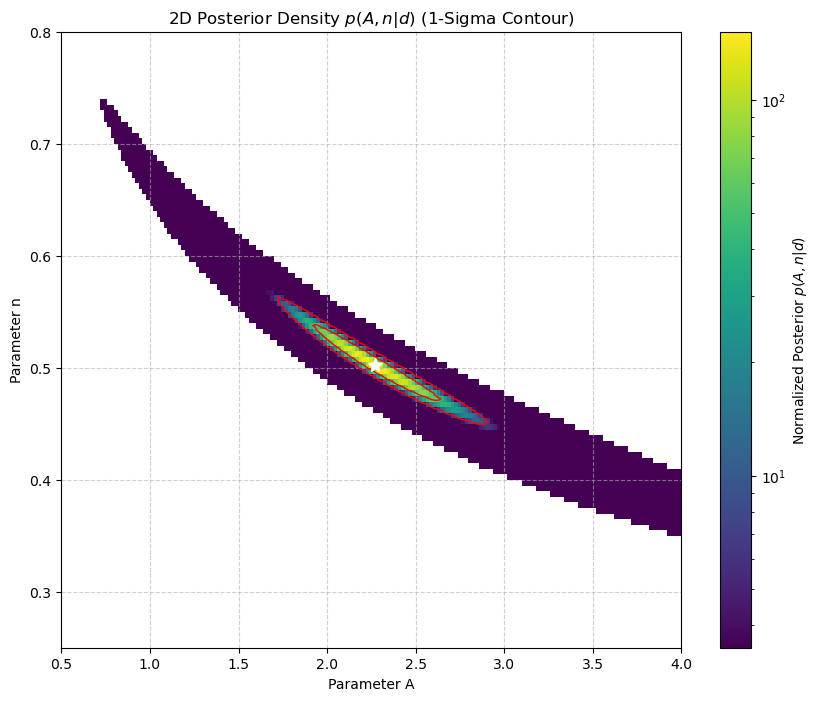

In [84]:
#plt.contour(A_grid, n_grid, p_norm, colors=['red'], linewidths=2)
from matplotlib.colors import LogNorm

plt.figure(figsize = (10,8))
im = plt.imshow(p_norm, origin='lower', extent=[A_min, A_max, n_min, n_max],
           aspect='auto', cmap='viridis', norm=LogNorm(vmin=P_crit_2sigma/2, vmax=P_max))

plt.contour(A_grid,n_grid,p_norm,levels = contour_levels , colors='red',linewidths = 1)
#best.points

plt.plot(A_best, n_best, 'w*', markersize=10, label=f'Best Fit ({A_best:.2f}, {n_best:.2f})')

#plt.legend(title="Credible Region", loc='upper right')
plt.title('2D Posterior Density $p(A, n|d)$ (1-Sigma Contour)')
plt.xlabel('Parameter A')
plt.ylabel('Parameter n')
plt.colorbar(im, label='Normalized Posterior $p(A, n|d)$') 
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0.25,0.8)
plt.xlim(0.5,4)
plt.show()


Calculating the Fisher matrix: $$ F_{ij} = \frac{\partial \mu}{\pi_i}^TC^{-1}\frac{\partial \mu}{\partial \pi_j}$$

For the first model the only parameter is A so the formula will be $$F_{ij} = \frac{\partial \mu}{\partial A}^TC^{-1}\frac{\partial \mu}{\partial A}$$

For the second one there are two parameters $A$ and $n$


In [70]:
## Constructing Covariance matrix:
C = 1.5**2*np.eye(20)
C_inv = np.linalg.inv(C)

def fisher_matrix_1(theta,C_inv):
    theta_matrix = np.array(theta**0.5).reshape(20,1)
    F=theta_matrix.T @C_inv @ theta_matrix
    return F[0,0]
first_model_fisher = fisher_matrix_1(theta_values,C_inv)
print(first_model_fisher)

inv_fisher = 1/first_model_fisher
print(inv_fisher) #This number, 0.0021, is the absolute minimum possible variance (σ^2) 
#that any unbiased estimator for A can achieve with this experiment.

#Find the Error Bar (The Standard Deviation): To get the "1-sigma error bar," you take the square root of the variance:
sigma_A = np.sqrt(inv_fisher)
print(sigma_A)
    

476.6702082966284
0.002097886510620163
0.04580269108491512


In [109]:
##model_3
theta = np.array(theta_values).reshape(20,1)


def fisher_matrix_3(A,n,C_inv,theta):
    theta_matrix = np.array(theta).reshape(20,1)
    v_A = (theta**n)
    v_n = A*theta**n *np.log(theta)
    F_AA = v_A.T@C_inv@v_A
    F_An = v_A.T@C_inv@v_n
    F_nn =v_n.T@C_inv@v_n
    F_nA = v_n.T@C_inv@v_A
    F = np.array([
        [F_AA,F_An],
        [F_nA,F_nn]
    ])
    return F

fisher = fisher_matrix_3(A_best,n_best,C_inv,theta_values)
print(fisher.shape)
inv_fisher = np.linalg.inv(fisher)
print(fisher @ inv_fisher)
print(inv_fisher)

sigma_A = inv_fisher[0,0]**0.5
sigma_n = inv_fisher[1,1]**0.5

print(sigma_A)
print(sigma_n)

(2, 2)
[[1. 0.]
 [0. 1.]]
[[ 0.05729221 -0.00532486]
 [-0.00532486  0.00051327]]
0.23935790829983897
0.02265549594316109


In [44]:
##DONE!

(20,)
